## 8. Classification

[Data Science Playlist on YouTube](https://www.youtube.com/watch?v=VLKEj9EN2ew&list=PLLBUgWXdTBDg1Qgmwt4jKtVn9BWh5-zgy)
[![Python Data Science](https://apmonitor.com/che263/uploads/Begin_Python/DataScience08.png)](https://www.youtube.com/watch?v=VLKEj9EN2ew&list=PLLBUgWXdTBDg1Qgmwt4jKtVn9BWh5-zgy "Python Data Science")

**Classification** predicts *discrete labels (outcomes)* such as `yes`/`no`, `True`/`False`, or any number of discrete levels such as a letter from text recognition, or a word from speech recognition. There are two main methods for training classifiers: unsupervised and supervised learning. The difference between the two is that unsupervised learning does not use labels while supervised learning uses labels to build the classifier. The goal of unsupervised learning is to cluster input features but without labels to guide the grouping. 

![list](https://apmonitor.com/che263/uploads/Begin_Python/list.png)

### Supervised Learning to Classify Numbers

A dataset that is included with sklearn is a set of 1797 images of numbers that are 64 pixels (8x8) each. There are labels with each to indicate the correct answer. A Support Vector Classifier is trained on the first half of the images.

In [1]:
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# train classifier
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
svc = svm.SVC(gamma=0.001)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)
svc.fit(X_train, y_train)
print('SVC Trained')

SVC Trained


![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Test Number Classifier

The image classification is trained on 10 randomly selected images from the other half of the data set to evaluate the training. Run the classifier test until you observe a misclassified number.

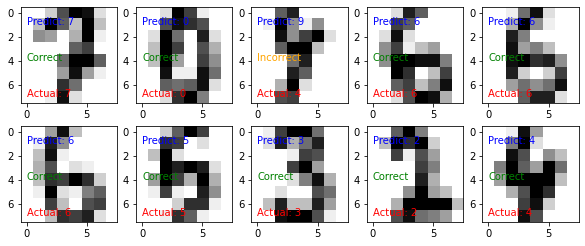

In [3]:
plt.figure(figsize=(10,4))
for i in range(10):
    n = np.random.randint(int(n_samples/2),n_samples)
    predict = svc.predict(digits.data[n:n+1])[0]
    plt.subplot(2,5,i+1)
    plt.imshow(digits.images[n], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.text(0,7,'Actual: ' + str(digits.target[n]),color='r')
    plt.text(0,1,'Predict: ' + str(predict),color='b')
    if predict==digits.target[n]:
        plt.text(0,4,'Correct',color='g')
    else:
        plt.text(0,4,'Incorrect',color='orange')
plt.show()

![buildings](https://apmonitor.com/che263/uploads/Begin_Python/buildings.png)

### Classification with Supervised Learning

Select data set option with `moons`, `cirlces`, or `blobs`. Run the following cell to generate the data that will be used to test the classifiers.

In [4]:
option = 'moons' # moons, circles, or blobs

n = 2000 # number of data points
X = np.random.random((n,2))
mixing = 0.0 # add random mixing element to data
xplot = np.linspace(0,1,100)
if option=='moons':
    X, y = datasets.make_moons(n_samples=n,noise=0.1)
    yplot = xplot*0.0
elif option=='circles':
    X, y = datasets.make_circles(n_samples=n,noise=0.1,factor=0.5)
    yplot = xplot*0.0
elif option=='blobs':
    X, y = datasets.make_blobs(n_samples=n,centers=[[-5,3],[5,-3]],cluster_std=2.0)
    yplot = xplot*0.0
# Split into train and test subsets (50% each)
XA, XB, yA, yB = train_test_split(X, y, test_size=0.5, shuffle=False)
# Plot regression results
def assess(P):
    plt.figure()
    plt.scatter(XB[P==1,0],XB[P==1,1],marker='^',color='blue',label='True')
    plt.scatter(XB[P==0,0],XB[P==0,1],marker='x',color='red',label='False')
    plt.scatter(XB[P!=yB,0],XB[P!=yB,1],marker='s',color='orange',\
                alpha=0.5,label='Incorrect')
    plt.legend()

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### S.1 Logistic Regression

**Definition:** Logistic regression is a machine learning algorithm for classification. In this algorithm, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function.

**Advantages:** Logistic regression is designed for this purpose (classification), and is most useful for understanding the influence of several independent variables on a single outcome variable.

**Disadvantages:** Works only when the predicted variable is binary, assumes all predictors are independent of each other, and assumes data is free of missing values.

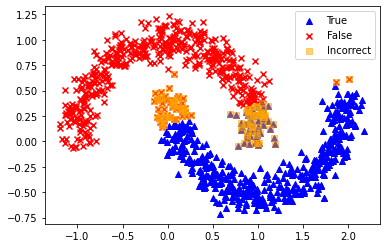

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')
lr.fit(XA,yA)
yP = lr.predict(XB)
assess(yP)

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### S.2 Naïve Bayes

**Definition:** Naive Bayes algorithm based on Bayes’ theorem with the assumption of independence between every pair of features. Naive Bayes classifiers work well in many real-world situations such as document classification and spam filtering.

**Advantages:** This algorithm requires a small amount of training data to estimate the necessary parameters. Naive Bayes classifiers are extremely fast compared to more sophisticated methods.

**Disadvantages:** Naive Bayes is known to be a bad estimator.

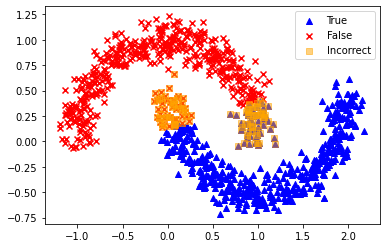

In [6]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(XA,yA)
yP = nb.predict(XB)
assess(yP)

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### S.3 Stochastic Gradient Descent

**Definition:** Stochastic gradient descent is a simple and very efficient approach to fit linear models. It is particularly useful when the number of samples is very large. It supports different loss functions and penalties for classification.

**Advantages:** Efficiency and ease of implementation.

**Disadvantages:** Requires a number of hyper-parameters and it is sensitive to feature scaling.

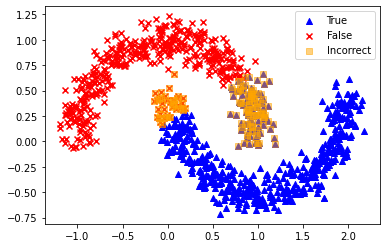

In [7]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
sgd.fit(XA,yA)
yP = sgd.predict(XB)
assess(yP)

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### S.4 K-Nearest Neighbours

**Definition:** Neighbours based classification is a type of lazy learning as it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the k nearest neighbours of each point.

**Advantages:** This algorithm is simple to implement, robust to noisy training data, and effective if training data is large.

**Disadvantages:** Need to determine the value of `K` and the computation cost is high as it needs to computer the distance of each instance to all the training samples. One possible solution to determine `K` is to add a feedback loop to determine the number of neighbors.

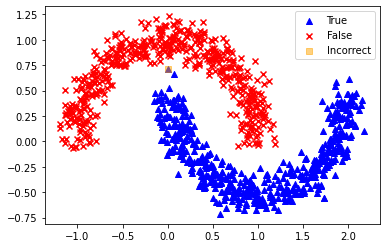

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(XA,yA)
yP = knn.predict(XB)
assess(yP)

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### S.5 Decision Tree

**Definition:** Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.

**Advantages:** Decision Tree is simple to understand and visualise, requires little data preparation, and can handle both numerical and categorical data.

**Disadvantages:** Decision tree can create complex trees that do not generalise well, and decision trees can be unstable because small variations in the data might result in a completely different tree being generated.

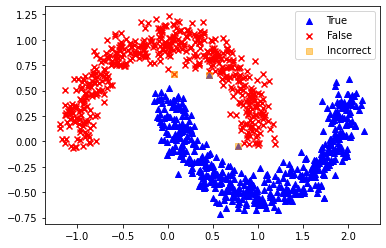

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10,random_state=101,\
                               max_features=None,min_samples_leaf=5)
dtree.fit(XA,yA)
yP = dtree.predict(XB)
assess(yP)

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### S.6 Random Forest

**Definition:** Random forest classifier is a meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

**Advantages:** Reduction in over-fitting and random forest classifier is more accurate than decision trees in most cases.

**Disadvantages:** Slow real time prediction, difficult to implement, and complex algorithm.

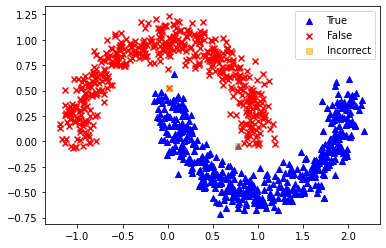

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=70,oob_score=True,\
                             n_jobs=1,random_state=101,max_features=None,\
                             min_samples_leaf=3) #change min_samples_leaf from 30 to 3
rfm.fit(XA,yA)
yP = rfm.predict(XB)
assess(yP)

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### S.7 Support Vector Classifier

**Definition:** Support vector machine is a representation of the training data as points in space separated into categories by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

**Advantages:** Effective in high dimensional spaces and uses a subset of training points in the decision function so it is also memory efficient.

**Disadvantages:** The algorithm does not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

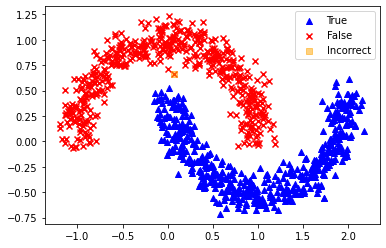

In [11]:
from sklearn.svm import SVC
svm = SVC(gamma='scale', C=1.0, random_state=101)
svm.fit(XA,yA)
yP = svm.predict(XB)
assess(yP)

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### S.8 Neural Network

The `MLPClassifier` implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.

**Definition:** A neural network is a set of neurons (activation functions) in layers that are processed sequentially to relate an input to an output.

**Advantages:** Effective in nonlinear spaces where the structure of the relationship is not linear. No prior knowledge or specialized equation structure is defined although there are different network architectures that may lead to a better result.

**Disadvantages:** Neural networks do not extrapolate well outside of the training domain. They may also require longer to train by adjusting the parameter weights to minimize a loss (objective) function. It is also more challenging to explain the outcome of the training and changes in initialization or number of epochs (iterations) may lead to different results. Too many epochs may lead to overfitting, especially if there are excess parameters beyond the minimum needed to capture the input to output relationship.

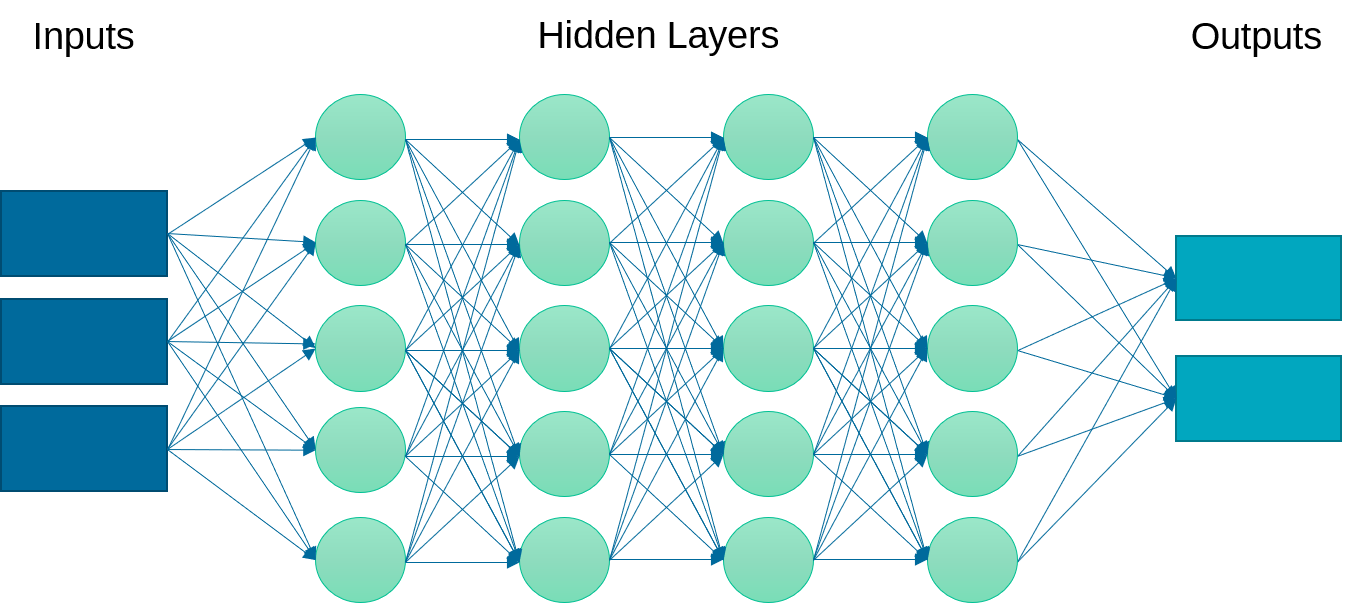

MLP trains on two arrays: array X of size (n_samples, n_features), which holds the training samples represented as floating point feature vectors; and array y of size (n_samples,), which holds the target values (class labels) for the training samples.
MLP can fit a non-linear model to the training data. clf.coefs_ contains the weight matrices that constitute the model parameters. Currently, MLPClassifier supports only the Cross-Entropy loss function, which allows probability estimates by running the predict_proba method. MLP trains using Backpropagation. More precisely, it trains using some form of gradient descent and the gradients are calculated using Backpropagation. For classification, it minimizes the Cross-Entropy loss function, giving a vector of probability estimates. MLPClassifier supports multi-class classification by applying Softmax as the output function. Further, the model supports multi-label classification in which a sample can belong to more than one class. For each class, the raw output passes through the logistic function. Values larger or equal to 0.5 are rounded to 1, otherwise to 0. For a predicted output of a sample, the indices where the value is 1 represents the assigned classes of that sample.

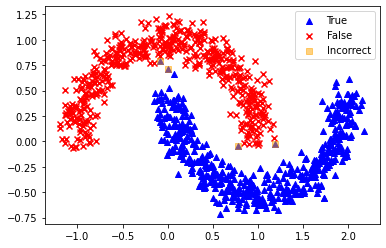

In [12]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs',alpha=1e-5,max_iter=200,activation='relu',\
                    hidden_layer_sizes=(10,30,10), random_state=1, shuffle=True)
clf.fit(XA,yA)
yP = clf.predict(XB)
assess(yP)

![animal_eggs](https://apmonitor.com/che263/uploads/Begin_Python/animal_eggs.png)

### Unsupervised Classification

Additional examples show the potential for unsupervised learning to classify the groups. Unsupervised learning does not use the labels (`True`/`False`) so the results may need to be switched to align with the test set with `if len(XB[yP!=yB]) > n/4: yP = 1 - yP 
`

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### U.1 K-Means Clustering

**Definition:**  Specify how many possible clusters (or K) there are in the dataset. The algorithm then iteratively moves the K-centers and selects the datapoints that are closest to that centroid in the cluster.

**Advantages:** The most common and simplest clustering algorithm.

**Disadvantages:** Must specify the number of clusters although this can typically be determined by increasing the number of clusters until the objective function does not change significantly.

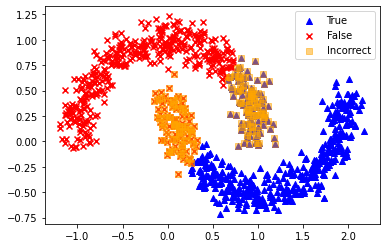

In [13]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(XA)
yP = km.predict(XB)
if len(XB[yP!=yB]) > n/4: yP = 1 - yP 
assess(yP)

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### U.2 Gaussian Mixture Model

**Definition:** Data points that exist at the boundary of clusters may simply have similar probabilities of being on either clusters. A mixture model predicts a probability instead of a hard classification such as K-Means clustering.

**Advantages:** Incorporates uncertainty into the solution.

**Disadvantages:** Uncertainty may not be desirable for some applications. This method is not as common as the K-Means method for clustering.

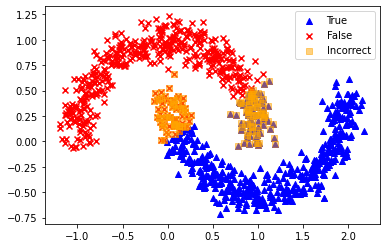

In [14]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(XA)
yP = gmm.predict_proba(XB) # produces probabilities
if len(XB[np.round(yP[:,0])!=yB]) > n/4: yP = 1 - yP 
assess(np.round(yP[:,0]))

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### U.3 Spectral Clustering

**Definition:** Spectral clustering is known as segmentation-based object categorization. It is a technique with roots in graph theory, where identify communities of nodes in a graph are based on the edges connecting them. The method is flexible and allows clustering of non graph data as well.
It uses information from the eigenvalues of special matrices built from the graph or the data set. 

**Advantages:** Flexible approach for finding clusters when data doesn’t meet the requirements of other common algorithms.

**Disadvantages:** For large-sized graphs, the second eigenvalue of the (normalized) graph Laplacian matrix is often ill-conditioned, leading to slow convergence of iterative eigenvalue solvers. Spectral clustering is computationally expensive unless the graph is sparse and the similarity matrix can be efficiently constructed.

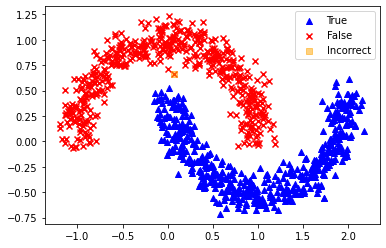

In [15]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=2,eigen_solver='arpack',\
                        affinity='nearest_neighbors')
yP = sc.fit_predict(XB) # No separation between fit and predict calls
                        # need to fit and predict on same dataset
if len(XB[yP!=yB]) > n/4: yP = 1 - yP 
assess(yP)

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### TCLab Activity

Train a classifier to predict if the heater is on (100%) or off (0%). Generate data with 10 minutes of 1 second data. If you do not have a TCLab, use one of the sample data sets.

- [Sample Data Set 1 (10 min)](http://apmonitor.com/do/uploads/Main/tclab_data5.txt): http://apmonitor.com/do/uploads/Main/tclab_data5.txt 
- [Sample Data Set 2 (60 min)](http://apmonitor.com/do/uploads/Main/tclab_data6.txt): http://apmonitor.com/do/uploads/Main/tclab_data6.txt

In [ ]:
# 10 minute data collection
import tclab, time
import numpy as np
import pandas as pd
with tclab.TCLab() as lab:
    n = 600; on=100; t = np.linspace(0,n-1,n)        
    Q1 = np.zeros(n); T1 = np.zeros(n)
    Q2 = np.zeros(n); T2 = np.zeros(n)    
    Q1[20:41]=on; Q1[60:91]=on; Q1[150:181]=on
    Q1[190:206]=on; Q1[220:251]=on; Q1[260:291]=on
    Q1[300:316]=on; Q1[340:351]=on; Q1[400:431]=on
    Q1[500:521]=on; Q1[540:571]=on; Q1[20:41]=on
    Q1[60:91]=on; Q1[150:181]=on; Q1[190:206]=on
    Q1[220:251]=on; Q1[260:291]=on
    print('Time Q1 Q2 T1   T2')
    for i in range(n):
        T1[i] = lab.T1; T2[i] = lab.T2
        lab.Q1(Q1[i])
        if i%5==0:
            print(int(t[i]),Q1[i],Q2[i],T1[i],T2[i])
        time.sleep(1)
data = np.column_stack((t,Q1,Q2,T1,T2))
data8 = pd.DataFrame(data,columns=['Time','Q1','Q2','T1','T2'])
data8.to_csv('08-tclab.csv',index=False)

Use the data file `08-tclab.csv` to train and test the classifier. Select and scale (0-1) the features of the data including `T1`, `T2`, and the 1st and 2nd derivatives of `T1`. Use the measured temperatures, derivatives, and heater value label to create a classifier that predicts when the heater is on or off. Validate the classifier with new data that was not used for training. Starting code is provided below but does not include `T2` as a feature input. **Add `T2` as an input feature to the classifer. Does it improve the classifier performance?**

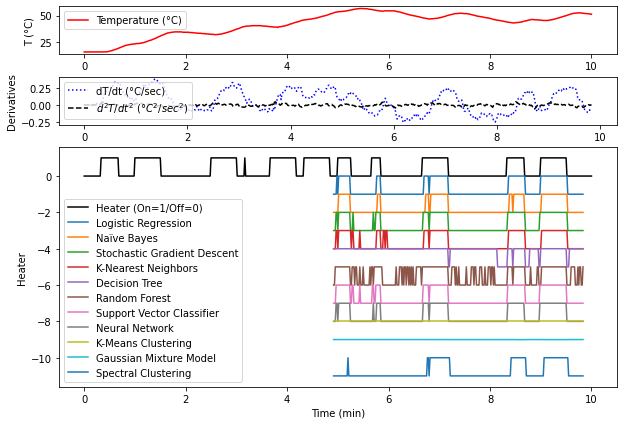

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

try:
    data = pd.read_csv('08-tclab.csv')
except:
    print('Warning: Unable to load 08-tclab.csv, using online data')
    url = 'http://apmonitor.com/do/uploads/Main/tclab_data5.txt'
    data = pd.read_csv(url)
    
# Input Features: Temperature and 1st / 2nd Derivatives
# Cubic polynomial fit of temperature using 10 data points
data['dT1'] = np.zeros(len(data))
data['d2T1'] = np.zeros(len(data))
for i in range(len(data)):
    if i<len(data)-10:
        x = data['Time'][i:i+10]-data['Time'][i]
        y = data['T1'][i:i+10]
        p = np.polyfit(x,y,3)
        # evaluate derivatives at mid-point (5 sec)
        t = 5.0
        data['dT1'][i] = 3.0*p[0]*t**2 + 2.0*p[1]*t+p[2]
        data['d2T1'][i] = 6.0*p[0]*t + 2.0*p[1]
    else:
        data['dT1'][i] = np.nan
        data['d2T1'][i] = np.nan

# Remove last 10 values
X = np.array(data[['T1','dT1','d2T1']][0:-10])
y = np.array(data[['Q1']][0:-10])

# Scale data
# Input features (Temperature and 2nd derivative at 5 sec)
s1 = MinMaxScaler(feature_range=(0,1))
Xs = s1.fit_transform(X)
# Output labels (heater On / Off)
ys = [True if y[i]>50.0 else False for i in range(len(y))]

# Split into train and test subsets (50% each)
XA, XB, yA, yB = train_test_split(Xs, ys, \
                    test_size=0.5, shuffle=False)

# Supervised Classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Create supervised classification models
lr = LogisticRegression(solver='lbfgs') # Logistic Regression
nb = GaussianNB() # Naïve Bayes
sgd = SGDClassifier(loss='modified_huber', shuffle=True,\
                    random_state=101) # Stochastic Gradient Descent
knn = KNeighborsClassifier(n_neighbors=5) # K-Nearest Neighbors
dtree = DecisionTreeClassifier(max_depth=10,random_state=101,\
          max_features=None,min_samples_leaf=5) # Decision Tree
rfm = RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=1,\
          random_state=101,max_features=None,min_samples_leaf=3) # Random Forest
svm = SVC(gamma='scale', C=1.0, random_state=101) # Support Vector Classifier
clf = MLPClassifier(solver='lbfgs',alpha=1e-5,max_iter=500,\
       activation='relu',hidden_layer_sizes=(10,30,10),\
       random_state=1, shuffle=True) # Neural Network
models = [lr,nb,sgd,knn,dtree,rfm,svm,clf]

# Supervised learning
yP = [None]*(len(models)+3) # 3 for unsupervised learning
for i,m in enumerate(models):
    m.fit(XA,yA)
    yP[i] = m.predict(XB)

# Unsupervised learning modules
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
km = KMeans(n_clusters=2)
gmm = GaussianMixture(n_components=2)
sc = SpectralClustering(n_clusters=2,eigen_solver='arpack',\
                        affinity='nearest_neighbors')
km.fit(XA)
yP[8] = km.predict(XB)
gmm.fit(XA)
yP[9] = gmm.predict_proba(XB)[:,0]
yP[10] = sc.fit_predict(XB)

plt.figure(figsize=(10,7))
gs = gridspec.GridSpec(3, 1, height_ratios=[1,1,5])
plt.subplot(gs[0])
plt.plot(data['Time']/60,data['T1'],'r-',\
         label='Temperature (°C)')
plt.ylabel('T (°C)')
plt.legend()
plt.subplot(gs[1])
plt.plot(data['Time']/60,data['dT1'],'b:',\
         label='dT/dt (°C/sec)')    
plt.plot(data['Time']/60,data['d2T1'],'k--',\
         label=r'$d^2T/dt^2$ ($°C^2/sec^2$)')
plt.ylabel('Derivatives')
plt.legend()

plt.subplot(gs[2])
plt.plot(data['Time']/60,data['Q1']/100,'k-',\
         label='Heater (On=1/Off=0)')

t2 = data['Time'][len(yA):-10].values
desc = ['Logistic Regression','Naïve Bayes','Stochastic Gradient Descent',\
        'K-Nearest Neighbors','Decision Tree','Random Forest',\
        'Support Vector Classifier','Neural Network',\
        'K-Means Clustering','Gaussian Mixture Model','Spectral Clustering']
for i in range(11):
    plt.plot(t2/60,yP[i]-i-1,label=desc[i])

plt.ylabel('Heater')
plt.legend()

plt.xlabel(r'Time (min)')
plt.legend()
plt.show()